In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime


In [32]:
#Unemployment Rate - 20 years
filename = 'data/rental_vacancy_rate_10_yrs.csv'
rental_vacancy_rate_src = pd.read_csv(filename,encoding='latin-1')

#Unemployment Rate - 20 years
filename = 'data/unemployment_rate_20_years.csv'
unemployment_rate_src = pd.read_csv(filename,encoding='latin-1')

#Describe Mortgage Rate
filename = 'data/zillow/MortgageRateConventionalFixed.csv'
mortgage_rates_src = pd.read_csv(filename)

#Describe Affordability Index
filename = 'data/zillow/Affordability_Wide_2019Q2_Public.csv'
affordability_index_src = pd.read_csv(filename,encoding='latin-1')

#Describe Affordability Income
filename = 'data/zillow/Affordability_Income_2018Q4.csv'
affordability_income_src = pd.read_csv(filename,encoding='latin-1')

#Median Rental Price - Single Family Residence
filename = 'data/zillow/City_MedianRentalPrice_Sfr.csv'
median_rental_price_sfr_src = pd.read_csv(filename)

#Median Rental Price Per Square Foot - Single Family Residence
filename = 'data/zillow/City_MedianRentalPricePerSqft_Sfr.csv'
median_rental_price_sft_sqft_src = pd.read_csv(filename)

#Median Rental Price - Multi-Family Residence
filename = 'data/zillow/City_MedianRentalPrice_Mfr5Plus.csv'
median_rental_price_mfr_src = pd.read_csv(filename)

#Median Rental Price Per Square Foot - Multi-Family Residence
filename = 'data/zillow/City_MedianRentalPricePerSqft_Mfr5Plus.csv'
median_rental_price_mfr_sqft_src = pd.read_csv(filename)

#Rental Index Per Square Foot - All Homes
filename = 'data/zillow/City_ZriPerSqft_AllHomes.csv'
rental_index_all_sqft_src = pd.read_csv(filename,encoding='latin-1')


In [33]:
rental_vacancy_rate_src.count()

DATE           41
RRVRUSQ156N    41
dtype: int64

In [34]:
rental_vacancy_rate_src.head()

,DATE,RRVRUSQ156N
0,2009-04-01,10.6
1,2009-07-01,11.1
2,2009-10-01,10.7
3,2010-01-01,10.6
4,2010-04-01,10.6


In [35]:
rental_vacancy_rate_src.describe()

,RRVRUSQ156N
count,41.00000
mean,8.17561
std,1.38253
min,6.60000
25%,7.00000
50%,7.50000
75%,9.20000
max,11.10000


In [38]:
rental_vacancy_rate_quartely = rental_vacancy_rate_src
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely.rename(columns={'RRVRUSQ156N':'Rate'})
rental_vacancy_rate_quartely['Date'] = pd.to_datetime(rental_vacancy_rate_quartely['DATE'], format='%Y-%m-%d')
rental_vacancy_rate_quartely['Year'] = pd.DatetimeIndex(rental_vacancy_rate_quartely['DATE']).year
rental_vacancy_rate_quartely['Month'] = pd.DatetimeIndex(rental_vacancy_rate_quartely['DATE']).month
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely.drop(columns='Date')
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely[['Year','Month','Rate']]
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely.groupby(['Year','Month']).median()
#mortgage_rates_monthly = mortgage_rates_monthly.set_index('Date').dropna(how='any')
#mortgage_rates_monthly = mortgage_rates_monthly.groupby(pd.Grouper(freq='M')).median().reset_index()  # update for v0.21+
rental_vacancy_rate_quartely.head()

Rate
Year Month      
2009 4      10.6
     7      11.1
     10     10.7
2010 1      10.6
     4      10.6

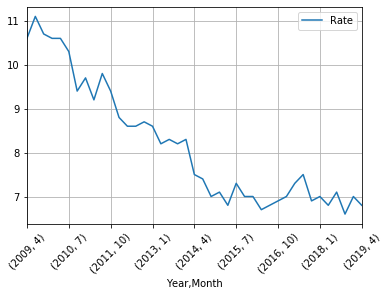

In [39]:
#Let's thorw up a quick plot to see change over time by Size / period
rental_vacancy_rate_quartely.plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()

In [28]:
unemployment_rate_src.count()

DATE           121
LNS14000024    121
dtype: int64

In [25]:
unemployment_rate_src.head()

,DATE,LNS14000024
0,2009-08-01,8.9
1,2009-09-01,9.1
2,2009-10-01,9.3
3,2009-11-01,9.2
4,2009-12-01,9.2


In [26]:
unemployment_rate_src.describe()

,LNS14000024
count,121.000000
mean,5.961983
std,1.997092
min,3.200000
25%,4.300000
50%,5.500000
75%,7.700000
max,9.300000


In [30]:
unemployment_rate_monthly = unemployment_rate_src
unemployment_rate_monthly = unemployment_rate_monthly.rename(columns={'LNS14000024':'Rate'})
unemployment_rate_monthly['Date'] = pd.to_datetime(unemployment_rate_monthly['DATE'], format='%Y-%m-%d')
unemployment_rate_monthly['Year'] = pd.DatetimeIndex(unemployment_rate_monthly['DATE']).year
unemployment_rate_monthly['Month'] = pd.DatetimeIndex(unemployment_rate_monthly['DATE']).month
unemployment_rate_monthly = unemployment_rate_monthly.drop(columns='Date')
unemployment_rate_monthly = unemployment_rate_monthly[['Year','Month','Rate']]
unemployment_rate_monthly = unemployment_rate_monthly.groupby(['Year','Month']).median()
#mortgage_rates_monthly = mortgage_rates_monthly.set_index('Date').dropna(how='any')
#mortgage_rates_monthly = mortgage_rates_monthly.groupby(pd.Grouper(freq='M')).median().reset_index()  # update for v0.21+
unemployment_rate_monthly.head()

Rate
Year Month      
2009 8       8.9
     9       9.1
     10      9.3
     11      9.2
     12      9.2

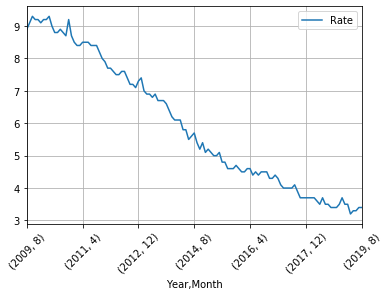

In [31]:
#Let's thorw up a quick plot to see change over time by Size / period
unemployment_rate_monthly.plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()

In [256]:
mortgage_rates_src.describe()

,MortgageRateConventionalFixed
count,91680.000000
mean,3.953478
std,0.358861
min,3.230000
25%,3.690000
50%,3.900000
75%,4.200000
max,5.000000


In [18]:
mortgage_rates_monthly = mortgage_rates_src
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='TimePeriod')
mortgage_rates_monthly = mortgage_rates_monthly.rename(columns={'MortgageRateConventionalFixed':'Rate'})
mortgage_rates_monthly['Date'] = pd.to_datetime(mortgage_rates_monthly['Date'], format='%Y-%m-%d')
mortgage_rates_monthly['Year'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).year
mortgage_rates_monthly['Month'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).month
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='Date')
mortgage_rates_monthly = mortgage_rates_monthly[['Year','Month','Rate']]
mortgage_rates_monthly = mortgage_rates_monthly.groupby(['Year','Month']).median()
#mortgage_rates_monthly = mortgage_rates_monthly.set_index('Date').dropna(how='any')
#mortgage_rates_monthly = mortgage_rates_monthly.groupby(pd.Grouper(freq='M')).median().reset_index()  # update for v0.21+
mortgage_rates_monthly.head()

Rate
Year Month      
2011 6      4.36
     7      4.45
     8      4.12
     9      3.97
     10     4.06

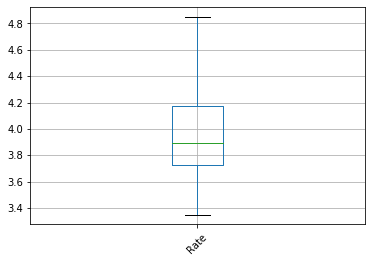

In [258]:
#Let's thorw up a quick plot to see change over time by Size / period
mortgage_rates_monthly.plot.box(rot=45, grid=True)
plt.show()

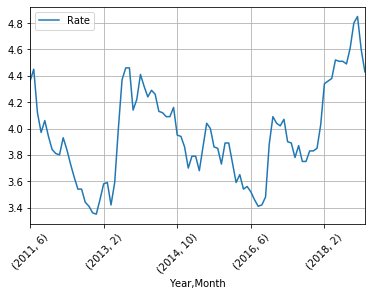

In [259]:
#Let's thorw up a quick plot to see change over time by Size / period
mortgage_rates_monthly.plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()

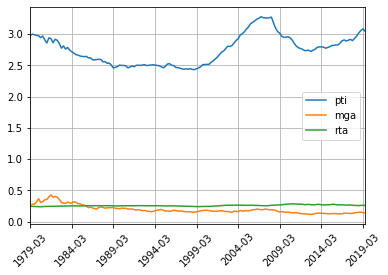

,RegionName,Index,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,...,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03,2019-06,State,City
0,United States,Price To Income,2.903590,2.939427,2.942101,2.946123,2.934565,2.930422,2.964477,2.917089,...,3.371671,3.383362,3.433804,3.473954,3.515177,3.568544,3.583441,3.562165,,United States
1,"New York, NY",Price To Income,2.928344,2.956635,2.966927,2.961860,3.007144,2.996565,3.060809,2.980520,...,5.405203,5.418615,5.467140,5.484124,5.495752,5.540017,5.559801,5.505950,NY,New York
2,"Los Angeles-Long Beach-Anaheim, CA",Price To Income,4.019673,4.141217,4.208146,4.278269,4.308551,4.384455,4.429802,4.435118,...,8.705759,8.797724,8.917271,8.912011,8.909573,8.929002,8.839738,8.744949,CA,Los Angeles-Long Beach-Anaheim
3,"Chicago, IL",Price To Income,3.035758,3.045651,2.984501,2.973171,2.895068,2.912028,2.774334,2.794168,...,3.074042,3.091003,3.128954,3.132292,3.129938,3.145848,3.155977,3.113370,IL,Chicago
4,"Dallas-Fort Worth, TX",Price To Income,3.887457,4.025835,4.101038,4.130605,4.135414,4.082676,4.122516,4.133618,...,3.110652,3.152714,3.262052,3.318315,3.358206,3.437634,3.475066,3.430203,TX,Dallas-Fort Worth


In [260]:
affordability_index = affordability_index_src#.set_index('Index',append=True)
#affordability_index.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_index.columns],names=['Year','Month'])
#affordability_index['Date'] = pd.to_datetime(affordability_index['Date'], format='%Y-%m')
affordability_index['State'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_index['City'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_index = affordability_index.drop(columns=['RegionID','SizeRank','HistoricAverage_1985thru1999'])

affordability_index.query("Index == 'Price To Income'").median().plot(rot=45, grid=True, label='pti')
affordability_index.query("Index == 'Mortgage Affordability'").median().plot(rot=45, grid=True, label='mga')
affordability_index.query("Index == 'Rent Affordability'").median().plot(rot=45, grid=True, label='rta')
#mortgage_rates_monthly.median().plot(rot=45, grid=True, label='mrt')
plt.legend(loc='best')
plt.show()

affordability_index.head()

In [261]:
from pandas.plotting import scatter_matrix
title = 'Scatter Matrix of All Observations'
affordability_index_tst= affordability_index.drop(columns=['RegionName','City'])
affordability_index_tst.set_index('Index',inplace=True)
#scatter_matrix(affordability_index_tst.median(), figsize=(12,12), grid=True, diagonal='kde', alpha=0.2, color='royalblue')
affordability_index_tst.head()
#affordability_index.groupby('Index').median().plot(rot=45, grid=True)
#plt.show()

,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,1981-03,1981-06,...,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03,2019-06,State
Index,,,,,,,,,,,,,,,,,,,,,
Price To Income,2.903590,2.939427,2.942101,2.946123,2.934565,2.930422,2.964477,2.917089,2.868660,2.875728,...,3.355605,3.371671,3.383362,3.433804,3.473954,3.515177,3.568544,3.583441,3.562165,
Price To Income,2.928344,2.956635,2.966927,2.961860,3.007144,2.996565,3.060809,2.980520,3.018619,3.067168,...,5.384573,5.405203,5.418615,5.467140,5.484124,5.495752,5.540017,5.559801,5.505950,NY
Price To Income,4.019673,4.141217,4.208146,4.278269,4.308551,4.384455,4.429802,4.435118,4.441902,4.471676,...,8.646457,8.705759,8.797724,8.917271,8.912011,8.909573,8.929002,8.839738,8.744949,CA
Price To Income,3.035758,3.045651,2.984501,2.973171,2.895068,2.912028,2.774334,2.794168,2.870144,2.975425,...,3.062159,3.074042,3.091003,3.128954,3.132292,3.129938,3.145848,3.155977,3.113370,IL
Price To Income,3.887457,4.025835,4.101038,4.130605,4.135414,4.082676,4.122516,4.133618,4.148369,4.124760,...,3.073047,3.110652,3.152714,3.262052,3.318315,3.358206,3.437634,3.475066,3.430203,TX


In [281]:
affordability_income = affordability_income_src
affordability_income['State'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_income['City'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_income = affordability_income.drop(columns=['RegionName','RegionID','SizeRank'])
affordability_income.set_index(['State','City'], inplace=True)
#affordability_income = pd.DataFrame(affordability_income.stack())
#affordability_income

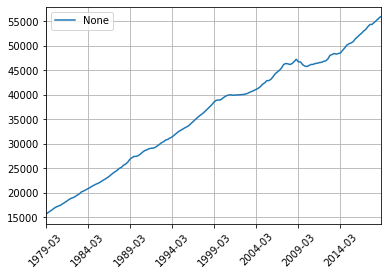

,,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,1981-03,1981-06,...,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12
State,City,,,,,,,,,,,,,,,,,,,,,
,United States,16346.86,16675.92,17015.62,17325.61,17700.06,18003.37,18309.93,18655.45,19069.98,19406.03,...,57766.34,58360.40,59165.91,59959.39,60741.39,61477.31,61936.623236,62395.936471,62855.249707,63314.562943
NY,New York,17536.34,17888.75,18255.17,18614.93,19075.72,19493.98,19894.97,20320.32,20744.95,21122.72,...,72364.87,72812.68,73819.12,74936.31,75963.84,76753.93,77408.082812,78062.235625,78716.388438,79370.541250
CA,Los Angeles-Long Beach-Anaheim,17913.83,18285.02,18746.27,19213.79,19782.36,20306.08,20737.44,21091.91,21468.44,21765.04,...,66466.82,67400.60,68525.74,69658.59,70516.54,71268.43,71844.905261,72421.380523,72997.855784,73574.331046
IL,Chicago,20056.35,20460.12,20910.06,21267.37,21678.20,21848.90,21984.03,22067.13,22395.99,22598.73,...,65979.46,66579.67,67326.11,68089.22,68769.39,69427.31,69940.585833,70453.861665,70967.137498,71480.413331
TX,Dallas-Fort Worth,18147.33,18458.77,18899.16,19454.80,20069.21,20608.07,21021.31,21363.17,21890.50,22279.25,...,64606.25,65180.46,66119.78,66969.37,67831.43,68607.56,69045.650070,69483.740139,69921.830209,70359.920279


In [282]:
affordability_income.median().plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()
affordability_income.head()

In [284]:
median_rental_price_sfr = median_rental_price_sfr_src
median_rental_price_sfr['State'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_sfr['City'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_sfr = median_rental_price_sfr.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
median_rental_price_sfr.set_index(['State','City'], inplace=True)
#median_rental_price_sfr.head()

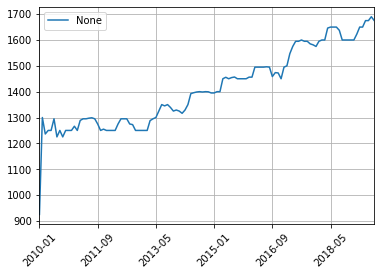

2010-01  2010-02  2010-03  2010-04  2010-05  2010-06  \
State City                                                                
      New York         NaN      NaN      NaN      NaN      NaN      NaN   
      Los Angeles      NaN      NaN      NaN      NaN      NaN      NaN   
      Houston          NaN      NaN      NaN      NaN      NaN      NaN   
      Chicago          NaN      NaN   1542.5   1500.0   1500.0   1600.0   
      San Antonio      NaN      NaN      NaN      NaN      NaN      NaN   

                   2010-07  2010-08  2010-09  2010-10  ...  2018-11  2018-12  \
State City                                             ...                     
      New York         NaN      NaN      NaN      NaN  ...   2500.0   2500.0   
      Los Angeles      NaN      NaN      NaN      NaN  ...   3995.0   3995.0   
      Houston          NaN      NaN      NaN      NaN  ...   1550.0   1550.0   
      Chicago       1600.0   1500.0   1650.0   1700.0  ...   1565.0   1550.0   
      San Antonio      NaN      NaN      NaN      NaN  ...   1295.0   1295.0   

                   2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  \
State City                                                                
      New York      2500.0   2500.0   2500.0   2500.0   2550.0   2500.0   
      Los Angeles   3949.0   3950.0   3875.0   3950.0   3995.0   3990.0   
      Houston       1550.0   1550.0   1550.0   1595.0   1600.0   1600.0   
      Chicago       1550.0   1595.0   1600.0   1600.0   1600.0   1605.0   
      San Antonio   1300.0   1295.0   1300.0   1300.0   1332.5   1350.0   

                   2019-07  2019-08  
State City                           
      New York      2500.0   2600.0  
      Los Angeles   3900.0   4000.0  
      Houston       1600.0   1600.0  
      Chicago       1650.0   1600.0  
      San Antonio   1350.0   1339.0  

[5 rows x 116 columns]

In [285]:
median_rental_price_sfr.median().plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()
median_rental_price_sfr.head()

In [288]:
median_rental_price_sft_sqft = median_rental_price_sft_sqft_src
median_rental_price_sft_sqft['State'] = median_rental_price_sft_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_sft_sqft['City'] = median_rental_price_sft_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_sft_sqft = median_rental_price_sft_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_sft_sqft.set_index(['State','City'], inplace=True)
#median_rental_price_sft_sqft.head()

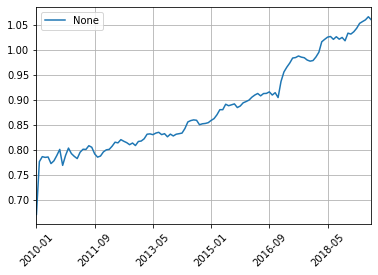

2010-01  2010-02   2010-03   2010-04   2010-05   2010-06  \
State City                                                                    
      New York         NaN      NaN       NaN       NaN       NaN       NaN   
      Los Angeles      NaN      NaN  1.676921  1.728179  1.725829  1.707474   
      Houston          NaN      NaN       NaN       NaN       NaN       NaN   
      Chicago          NaN      NaN       NaN       NaN       NaN       NaN   
      San Antonio      NaN      NaN       NaN       NaN       NaN       NaN   

                    2010-07   2010-08   2010-09   2010-10  ...   2019-01  \
State City                                                 ...             
      New York          NaN       NaN       NaN       NaN  ...  2.399000   
      Los Angeles  1.737567  1.818182  1.767982  1.782531  ...  2.626128   
      Houston           NaN       NaN       NaN       NaN  ...  0.938967   
      Chicago           NaN       NaN       NaN       NaN  ...  1.659387   
      San Antonio       NaN       NaN       NaN       NaN  ...  0.862069   

                    2019-02   2019-03   2019-04   2019-05   2019-06   2019-07  \
State City                                                                      
      New York     2.488433  2.510986  2.553778  2.594242  2.583333  2.500000   
      Los Angeles  2.673983  2.651515  2.690100  2.736318  2.771493  2.750924   
      Houston      0.941667  0.949367  0.961538  0.975014  0.978820  0.974817   
      Chicago      1.814709  1.842634  1.795039  1.771255  1.785714  1.790000   
      San Antonio  0.869247  0.877371  0.887311  0.886067  0.887507  0.888823   

                    2019-08  State         City  
State City                                       
      New York     2.550000            New York  
      Los Angeles  2.760252         Los Angeles  
      Houston      0.972868             Houston  
      Chicago      1.782609             Chicago  
      San Antonio  0.885246         San Antonio  

[5 rows x 118 columns]

In [289]:
median_rental_price_sft_sqft.median().plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()
median_rental_price_sft_sqft.head()

In [290]:
median_rental_price_mfr = median_rental_price_mfr_src
median_rental_price_mfr['State'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_mfr['City'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_mfr = median_rental_price_mfr.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
median_rental_price_mfr.head()

,State,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,City
0,,NaN,2200.0,2397.5,2500.0,2450.0,2595.0,2500.0,2395.0,2550.0,...,2475.0,2475.0,2499.0,2500.0,2575.0,2600.0,2650.0,2650.0,2650.0,New York
1,,NaN,1762.5,1750.0,1945.0,2000.0,2100.0,2100.0,2200.0,1950.0,...,2550.0,2565.0,2550.0,2550.0,2595.0,2561.0,2585.0,2580.0,2595.0,Los Angeles
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1385.0,1367.0,1372.0,1385.0,1380.0,1375.0,1379.0,1369.0,1368.0,Houston
3,,1645.0,1350.0,1315.0,1325.0,1307.5,1350.0,1300.0,1295.0,1395.0,...,1700.0,1745.0,1750.0,1795.0,1795.0,1795.0,1795.0,1750.0,1725.0,Chicago
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,910.5,...,1141.0,1166.0,1177.0,1175.0,1179.0,1198.0,1210.0,1203.0,1186.0,San Antonio


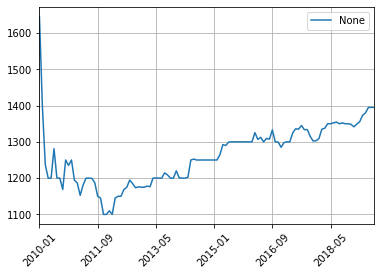

,State,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,City
0,,NaN,2200.0,2397.5,2500.0,2450.0,2595.0,2500.0,2395.0,2550.0,...,2475.0,2475.0,2499.0,2500.0,2575.0,2600.0,2650.0,2650.0,2650.0,New York
1,,NaN,1762.5,1750.0,1945.0,2000.0,2100.0,2100.0,2200.0,1950.0,...,2550.0,2565.0,2550.0,2550.0,2595.0,2561.0,2585.0,2580.0,2595.0,Los Angeles
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1385.0,1367.0,1372.0,1385.0,1380.0,1375.0,1379.0,1369.0,1368.0,Houston
3,,1645.0,1350.0,1315.0,1325.0,1307.5,1350.0,1300.0,1295.0,1395.0,...,1700.0,1745.0,1750.0,1795.0,1795.0,1795.0,1795.0,1750.0,1725.0,Chicago
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,910.5,...,1141.0,1166.0,1177.0,1175.0,1179.0,1198.0,1210.0,1203.0,1186.0,San Antonio


In [291]:
median_rental_price_mfr.median().plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()
median_rental_price_mfr.head()

In [292]:
median_rental_price_mfr_sqft = median_rental_price_mfr_sqft_src
median_rental_price_mfr_sqft['State'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_mfr_sqft['City'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_mfr_sqft = median_rental_price_mfr_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
median_rental_price_mfr_sqft.head()

,State,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,City
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.055556,3.055556,3.080000,3.125000,3.312500,3.333333,3.466667,3.487982,3.375000,New York
1,,NaN,1.529126,1.650546,1.651665,1.646133,1.65729,1.722735,1.726789,1.730697,...,3.149802,3.100000,3.094003,3.114658,3.159391,3.146154,3.181818,3.179843,3.201931,Los Angeles
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.533333,1.517682,1.516520,1.526667,1.520193,1.515152,1.526718,1.524743,1.523207,Houston
3,,NaN,1.392857,1.470588,1.417424,1.500317,1.40000,1.405921,1.644133,1.693333,...,2.162500,2.214286,2.316364,2.343157,2.268293,2.242857,2.262702,2.247407,2.250000,Chicago
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946632,0.916881,...,1.278092,1.279703,1.321175,1.320106,1.322815,1.338574,1.353028,1.352830,1.337331,San Antonio


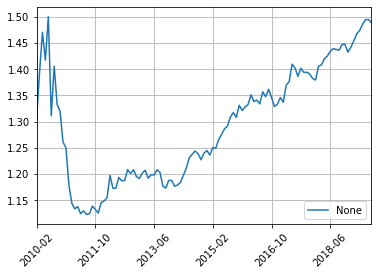

,State,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,City
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.055556,3.055556,3.080000,3.125000,3.312500,3.333333,3.466667,3.487982,3.375000,New York
1,,NaN,1.529126,1.650546,1.651665,1.646133,1.65729,1.722735,1.726789,1.730697,...,3.149802,3.100000,3.094003,3.114658,3.159391,3.146154,3.181818,3.179843,3.201931,Los Angeles
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.533333,1.517682,1.516520,1.526667,1.520193,1.515152,1.526718,1.524743,1.523207,Houston
3,,NaN,1.392857,1.470588,1.417424,1.500317,1.40000,1.405921,1.644133,1.693333,...,2.162500,2.214286,2.316364,2.343157,2.268293,2.242857,2.262702,2.247407,2.250000,Chicago
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946632,0.916881,...,1.278092,1.279703,1.321175,1.320106,1.322815,1.338574,1.353028,1.352830,1.337331,San Antonio


In [293]:
median_rental_price_mfr_sqft.median().plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()
median_rental_price_mfr_sqft.head()

In [299]:
rental_index_all_sqft = rental_index_all_sqft_src
rental_index_all_sqft['State'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
rental_index_all_sqft['City'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
rental_index_all_sqft = rental_index_all_sqft.drop(columns=['RegionID','RegionName','Metro','CountyName','SizeRank']).dropna(how='all')

#rental_index_all_sqft.head()

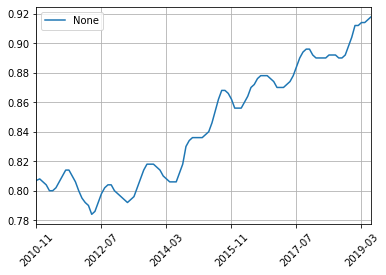

,State,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,City
0,,1.446,1.452,1.454,1.454,1.446,1.440,1.434,1.430,1.426,...,1.864,1.884,1.912,1.934,1.938,1.938,1.936,1.924,1.912,New York
1,,1.584,1.582,1.580,1.578,1.578,1.580,1.584,1.588,1.594,...,2.192,2.210,2.232,2.252,2.262,2.264,2.266,2.266,2.266,Los Angeles
2,,0.792,0.782,0.780,0.780,0.786,0.788,0.790,0.792,0.792,...,0.992,0.998,1.004,1.010,1.012,1.014,1.014,1.012,1.012,Houston
3,,1.252,1.256,1.258,1.254,1.244,1.230,1.222,1.216,1.216,...,1.392,1.406,1.424,1.434,1.436,1.436,1.438,1.436,1.438,Chicago
4,,0.696,0.698,0.700,0.698,0.696,0.694,0.692,0.692,0.692,...,0.854,0.862,0.870,0.878,0.880,0.880,0.882,0.884,0.888,San Antonio


In [300]:
rental_index_all_sqft.median().plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()
rental_index_all_sqft.head()